<a href="https://colab.research.google.com/github/santywin/AprendeMachineLearning/blob/main/primera_regresion_lineal_755953b4_3c16_42de_a9e3_78fe9742244f.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a regresión lineal 
En esta notebook aprenderás qué es una regresión lineal y cómo funciona con un ejemplo con Python. Para esto lo primero que tendremos que hacer es descargar los datos y entender qué contienen.

## Importando datos

In [1]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Entendiendo los datos
Una vez descargados los datos hay que entenderlos. Es importante saber que el algoritmo de regresión lineal se basa altamente en correlaciones por lo que recomiendo que empecemos viendo un gráfico de correlaciones usando **[pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)** de ***Seaborn***.

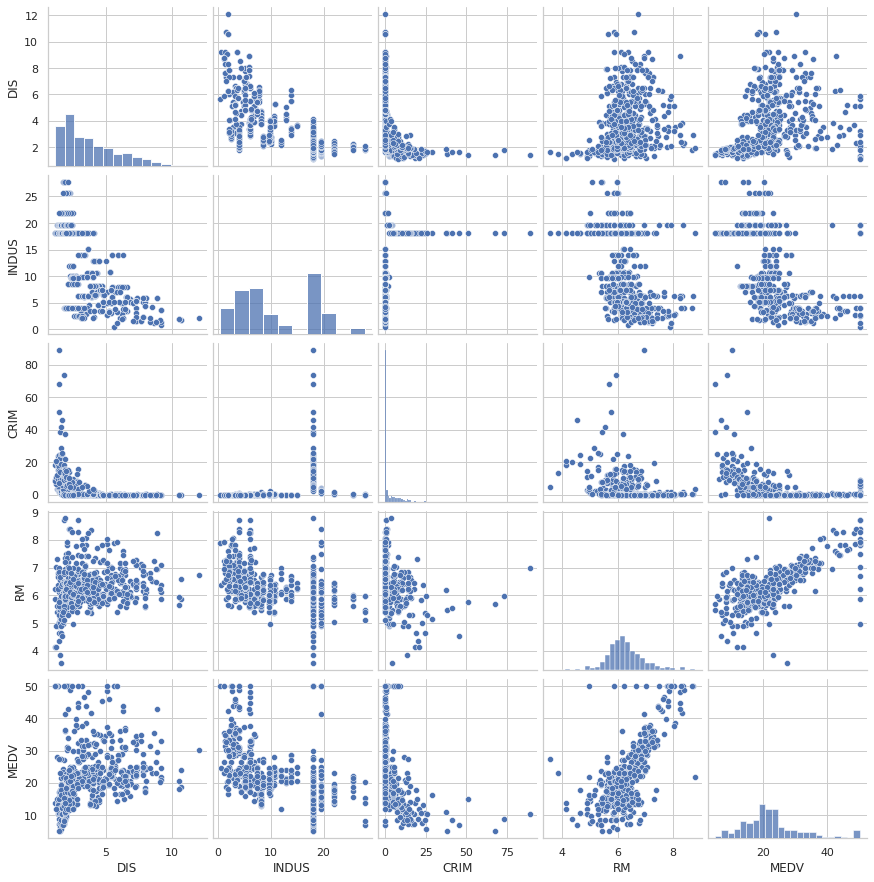

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid', context='notebook')
cols = ['DIS','INDUS','CRIM', 'RM', 'MEDV']
sns.pairplot(df[cols], height=2.5)
plt.show()

Una vez que vemos cómo están correlacionadas las variables de manera visual, es importante usar un método numérico para poder entender las correlaciones. 

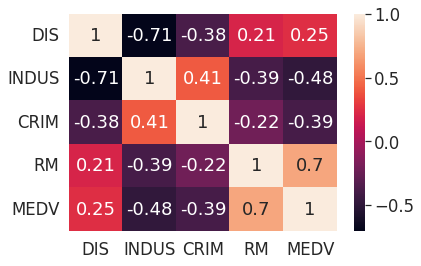

In [ ]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
sns.heatmap(cm, cbar=True, annot=True,yticklabels=cols,xticklabels=cols)

## Creando el modelo con scikit-learn

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X = df['RM'].values.reshape(-1, 1)
y = df['MEDV'].values.reshape(-1, 1)

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(X_std, y_std)

LinearRegression()

## Análisis de resultados

Text(0.5, 0, 'Promedio de habitaciones [RM]')

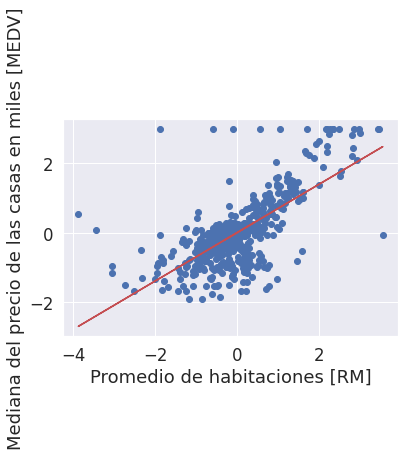

In [ ]:
plt.scatter(X_std,y_std)
plt.plot(X_std,slr.predict(X_std), color='R')
plt.ylabel("Mediana del precio de las casas en miles [MEDV]")
plt.xlabel("Promedio de habitaciones [RM]")

## Generando predicción con el modelo

In [ ]:
num_habitaciones = 5
num_habitaciones_std = sc_x.transform(np.array([num_habitaciones]).reshape(-1,1))
print("El precio de una casa con 5 habitaciones en Boston es de ", sc_y.inverse_transform(slr.predict(num_habitaciones_std)))

el precio de una casa con 5 habitaciones en boston es de  [[10.83992413]]
